In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/LAI25-SM002/modis_flood_features_cleaned_v1.1.csv")

In [ ]:
df

,date,lon,lat,flooded,jrc_perm_water,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,2003-12-10,120.478677,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,0.0,0.116685,270.000000,0.031990,1.042098,0
1,2003-12-10,120.480923,-6.495942,1.0,1.0,9.645125,28.935376,6190.93062,-0.051446,17.0,1.0,0.839713,236.480074,0.031990,1.042098,0
2,2003-12-10,120.478677,-6.493697,0.0,1.0,9.645125,28.935376,6190.93062,0.028399,17.0,0.0,0.466730,270.000000,0.031990,1.042098,0
3,2003-12-10,120.480923,-6.493697,1.0,0.0,9.645125,28.935376,6190.93062,0.028399,17.0,4.0,0.939179,240.413746,0.021235,0.258796,1
4,2003-12-10,120.478677,-6.491451,0.0,1.0,9.645125,28.935376,6190.93062,-0.002506,17.0,0.0,0.583403,270.000000,0.031990,1.042098,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472151,2015-02-05,119.993587,-2.033561,0.0,0.0,0.000000,28.890709,7350.50000,0.147577,2.0,1823.0,12.938313,185.563432,0.012814,-2.886395,0
1472152,2015-02-05,120.045240,-2.033561,0.0,0.0,0.000000,16.990467,7708.00000,0.176538,2.0,1821.0,4.306543,353.825964,12.493469,5.111412,0
1472153,2015-02-05,120.067698,-2.033561,0.0,0.0,0.000000,17.418119,7778.00000,0.211370,2.0,1952.0,3.456576,103.562198,0.010678,-1.732814,0
1472154,2015-02-05,120.072190,-2.033561,0.0,0.0,0.000000,17.418119,7778.00000,0.203239,2.0,1954.0,5.590498,187.129463,1.586803,2.785699,0


In [ ]:
flood_data = df.drop(columns = ['flooded', 'jrc_perm_water', 'date'])

<Axes: >

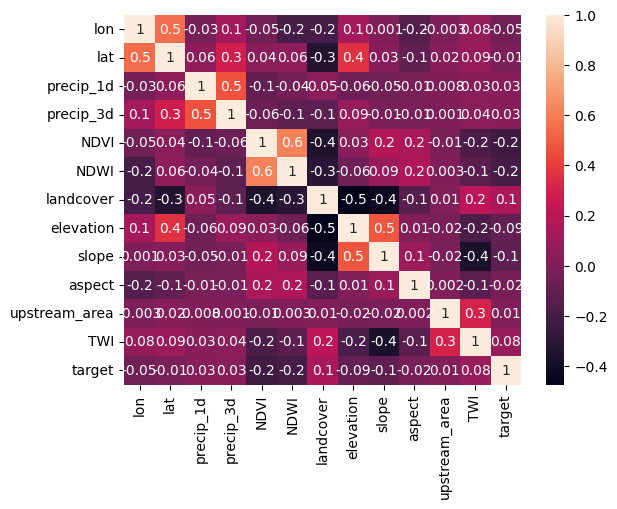

In [ ]:
corr = flood_data.corr()
sns.heatmap(corr, annot = True, fmt=".1g")

In [ ]:
categorical_columns = ['landcover', 'target']
already_normalized = ['NDVI', 'NDWI']
remove_from_numeric = categorical_columns + already_normalized
remove_from_numeric


['landcover', 'target', 'NDVI', 'NDWI']

In [ ]:
numerical_columns = list(flood_data.columns)
for col in remove_from_numeric:
  numerical_columns.remove(col)


In [ ]:
numerical_columns

['lon',
 'lat',
 'precip_1d',
 'precip_3d',
 'elevation',
 'slope',
 'aspect',
 'upstream_area',
 'TWI']

In [ ]:
scaler = StandardScaler()
flood_data[numerical_columns] = scaler.fit_transform(flood_data[numerical_columns])

In [ ]:
flood_data

,lon,lat,precip_1d,precip_3d,NDVI,NDWI,landcover,elevation,slope,aspect,upstream_area,TWI,target
0,0.599855,-2.390323,-0.134683,-0.420266,6190.93062,-0.051446,17.0,-0.509206,-0.684174,1.046729,-0.090828,-0.228615,0
1,0.604275,-2.390323,-0.134683,-0.420266,6190.93062,-0.051446,17.0,-0.506426,-0.363499,0.726322,-0.090828,-0.228615,0
2,0.599855,-2.388171,-0.134683,-0.420266,6190.93062,0.028399,17.0,-0.509206,-0.528923,1.046729,-0.090828,-0.228615,0
3,0.604275,-2.388171,-0.134683,-0.420266,6190.93062,0.028399,17.0,-0.498088,-0.319384,0.763923,-0.090914,-0.511254,1
4,0.599855,-2.386020,-0.134683,-0.420266,6190.93062,-0.002506,17.0,-0.509206,-0.477177,1.046729,-0.090828,-0.228615,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1472151,-0.354822,1.884619,-0.812658,-0.421701,7350.50000,0.147577,2.0,4.557593,5.002444,0.239625,-0.090981,-1.646136,0
1472152,-0.253167,1.884619,-0.812658,-0.803967,7708.00000,0.176538,2.0,4.552034,1.174102,1.847995,0.008392,1.239719,0
1472153,-0.208969,1.884619,-0.812658,-0.790229,7778.00000,0.211370,2.0,4.916132,0.797126,-0.544199,-0.090998,-1.229888,0
1472154,-0.200129,1.884619,-0.812658,-0.790229,7778.00000,0.203239,2.0,4.921691,1.743559,0.254595,-0.078448,0.400530,0


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(flood_data.drop(columns = ['target']), flood_data['target'], test_size = 0.2, random_state = 42)

In [ ]:
print(f"X_train_shape : {X_train.shape}\nX_test_shape : {X_test.shape}\nY_train_shape : {Y_train.shape}\nY_test_shape : {Y_test.shape}")

X_train_shape : (1177724, 12)
X_test_shape : (294432, 12)
Y_train_shape : (1177724,)
Y_test_shape : (294432,)


In [ ]:
clf = LogisticRegression(random_state=0, class_weight='balanced', solver='saga', max_iter=1000, verbose = 1, n_jobs = -1).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


max_iter reached after 968 seconds


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
report = classification_report(Y_test, clf.predict(X_test))
print(report)

              precision    recall  f1-score   support

           0       0.99      0.80      0.88    284526
           1       0.13      0.86      0.22      9906

    accuracy                           0.80    294432
   macro avg       0.56      0.83      0.55    294432
weighted avg       0.96      0.80      0.86    294432



<Axes: >

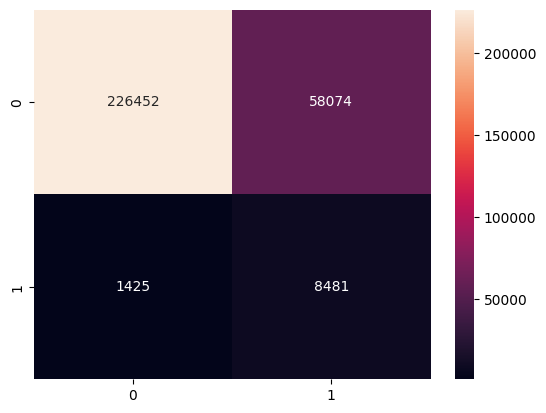

In [ ]:
confusion_matrix_report = confusion_matrix(Y_test, clf.predict(X_test))
sns.heatmap(confusion_matrix_report, annot = True, fmt = "d")

In [ ]:
clf_cv = LogisticRegressionCV(cv=5, random_state=0, class_weight='balanced', solver='saga', max_iter=1000, verbose = 1, n_jobs = -1).fit(X_train, Y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


convergence after 3740 epochs took 4084 seconds
convergence after 3720 epochs took 4218 seconds
convergence after 3322 epochs took 3583 seconds
convergence after 3297 epochs took 3689 seconds
convergence after 1044 epochs took 1114 seconds
convergence after 162 epochs took 172 seconds
convergence after 22 epochs took 24 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 3 seconds
convergence after 2 epochs took 2 seconds
convergence after 1037 epochs took 1158 seconds
convergence after 162 epochs took 180 seconds
convergence after 21 epochs took 24 seconds
convergence after 3 epochs took 3 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 2 seconds
convergence after 2 epochs took 3 seconds
convergence after 2 epochs took 3 seconds
convergence after 3732 epochs took 4053 seconds
convergence after 3738 epochs took 4403 seconds


In [ ]:
report = classification_report(Y_test, clf_cv.predict(X_test))
print(report)